# Perceptron

The aim of this worksheet is to review the steps involved in *perceptron* training algorithm, and to assess how this method can behave in practical scenarios.

As a first step required for both parts, setup the ipython notebook environment to include numpy, scipy, matplotlib etc.

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In this tutorial, we are going to use synthetic data. The advantage of using synthetic data is that we have control over the shape of the data, which is useful in studying properties of machine learning methods.

We are going to generate data using a function defined below. This function produces S-shaped dataset which is mostly separable, but not necessarily linearly separable. We can control the degree of separability. The resulting dataset is going to be two-dimensional (so that we can plot it) with a binary label. That is, the dataset is a $N\times2$ array of instances coupled with an $N\times1$ of labels. The classes are encoded as $-1$ and $1$.

Since the dataset is a tuple of two arrays, we are going to use a special data structure called *named tuple* from a Python module called *collections*.

In [2]:
import collections

def generate_s_shaped_data(gap=3):
    x = np.random.randn(80, 2)
    x[10:20] += np.array([3, 4])
    x[20:30] += np.array([0, 8])
    x[30:40] += np.array([3, 12])

    x[40:50] += np.array([gap, 0])
    x[50:60] += np.array([3 + gap, 4])
    x[60:70] += np.array([gap, 8])
    x[70:80] += np.array([3 + gap, 12])

    t = np.hstack([-np.ones(40), np.ones(40)])
    
    d = collections.namedtuple('Dataset', ['x', 't'])
    d.x = x
    d.t = t
    return d

A perceptron is a linear classifier. Therefore, we will aim to generate linearly separable data.

We start with generating training data. 

[[ -9.70576856e-01  -1.21783402e+00]
 [ -5.22086732e-01  -1.32132156e+00]
 [  3.48133223e-01  -1.14587810e+00]
 [  5.31941369e-04  -7.88825086e-01]
 [  5.52237333e-01   6.67452388e-01]
 [  8.23342847e-01   1.69446203e+00]
 [ -1.78365722e-01   1.16728948e+00]
 [ -1.40854597e+00  -6.10354643e-02]
 [  3.33896408e-02  -3.78739983e-01]
 [  9.31117005e-02  -3.24659230e-01]
 [  4.22549826e+00   4.60741779e+00]
 [  1.95581028e+00   4.67840027e+00]
 [  2.02719192e+00   4.00057089e+00]
 [  1.69068383e+00   4.04530397e+00]
 [  3.22424177e+00   3.10260329e+00]
 [  1.35929307e+00   3.94525841e+00]
 [  3.84475051e+00   4.72571747e+00]
 [  2.17720950e+00   3.14047071e+00]
 [  4.53712199e+00   4.46563426e+00]
 [  2.44911453e+00   2.73031954e+00]
 [ -2.19663525e+00   8.40183246e+00]
 [  1.49454547e+00   8.33310721e+00]
 [ -1.85957914e+00   7.90151226e+00]
 [ -3.58638622e-01   7.27651480e+00]
 [ -9.73159853e-01   8.08281332e+00]
 [  2.01214848e-01   6.52471862e+00]
 [  5.90897746e-01   5.90756584e+00]
 

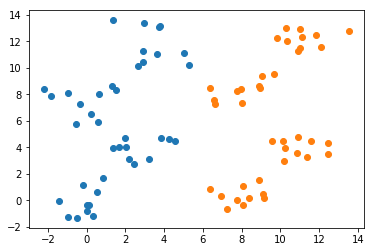

In [3]:
d  = generate_s_shaped_data(8)
print(d.x)
print(d.t)
x = d.x
y = d.t

plt.plot(x[y==-1,0], x[y==-1,1], "o")
plt.plot(x[y==1,0], x[y==1,1], "o")

### Perceptron algorithm

Next we will train a binary classifier on this data. For this we’ll use the perceptron algorithm, which
you should recall takes a model of the form
$$\begin{align*}
 s(\mathbf{x}) &= w_0 + \mathbf{w}' \mathbf{x} \\
 predict(\mathbf{x}) &= \left\{ 
\begin{array}{cc} 
1, & \mbox{if $s(\mathbf{x}) \geq 0$} \\
-1, &  \mbox{otherwise}
\end{array} \right .
\end{align*}$$


For simplicity, we will use the standard trick to incorporate the bias term $w_0$ into the weights $\mathbf{w}$ by using a basis function $\phi(x_1, x_2) = [1~x_1~x_2]'$ which adds an extra constant dimension. The model becomes
$$ s(\mathbf{x}) = \mathbf{w}' \phi(\mathbf{x}) $$
To do this, simply concatenate a column of 1s to the data matrix.

In [4]:
Phi = np.column_stack([np.ones(x.shape[0]), x])
print (Phi.shape, Phi.min(),Phi.max())


(80, 3) -2.19663525046 13.59968158


Note that Phi now has $3$ columns. In this array, each training instance is a row and each column is a feature. From now on we will use Phi instead of x. Each row represents $\phi(\mathbf{x})$ for a training instance.

### Prediction function

Next, write the prediction function (aka discriminant). This takes as input a data point (a row from Phi, i.e., a vector of 3 numbers) and the model parameters ($\mathbf{w}$) and outputs predicted label $1$ or $-1$. Recall that if $s(\mathbf{x})=0$, the predicted class is $1$.

In [5]:
def perc_pred(phi, w):
#     s = np.dot(phi, w) # over to you
    s = np.sign(np.sign(np.dot(phi, w))+0.5)
#     s = [1 if x>=0 else -1 for x in s]
    return s

Don't forget to test your prediction function with some examples! Note that it's more useful if it can support phi inputs both as vectors (returning a scalar, either +1/-1) and as matrices (returning a vector of +1/-1 values). The latter allows for you to supply a full dataset in one call.

In [6]:
print(perc_pred([1, 0, 1], [1, 2, 3]))

1.0


In [7]:
print(perc_pred(Phi, [1,2,3]))

[-1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.]


### Training algorithm

Now for training algorithm which fits the weights, $\mathbf{w}$, to the training data. Recall that this is an online training algorithm, and we are going to iterate through the training examples one by one. Moreover, we are going to do several cycles, called *epochs*, such that we iterate through the entire training set within one epoch. Write a function called *train* which takes the basis data matrix *Phi*, the labels *t* and a number of epochs. This should implement the following pseudo-code:

> initialise weights to zero 

> repeat epoch times

> >   for each x and t pair in the training set

> > >       if model prediction and y differ, make weight update

> return weights

The weight update in the inner loop is $\mathbf{w} \leftarrow \mathbf{w} + y \phi(\mathbf{x})$.
What is the purpose of this update?

In [8]:
def train(data, target, epochs, w , eta= 1.):
    for e in range(epochs):
        for i in range(data.shape[0]):
            yhat = perc_pred(data[i,:], w) # over to you?????
            if yhat != target[i]:
                w = w + np.dot(np.dot(eta,target[i]),data[i]) # over to you
    return w

Run your training algorithm for 5 epochs to learn the weights

In [9]:
w = np.zeros(Phi.shape[1])
w = train(Phi, y, 5, w)
w

array([-11.        ,  18.08020698,  -0.89515782])

### Evaluation

We are going to use the proportion of misclassified cases as the quality measure.

In [15]:
Accuracy = np.sum(perc_pred(Phi,w)==y) / float(y.shape[0]) # over to you
print(Accuracy)

0.7125


Rerun your training with a larger number of epochs (10, 100, 1000), and evaluate how the accuracy changes. 

### Heldout evaluation

Evaluating on the training data is not a good idea in general, other than for debugging your algorithms. (Can you explain why?) We are going to generate another synthetic data thus essentially creating a fresh *heldout set*. What is the accuracy on this heldout data, and how does this compare to training accuracy?

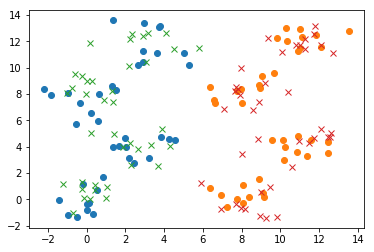

In [11]:
d_held = generate_s_shaped_data(8)
x_heldout = d_held.x 
y_heldout = d_held.t


plt.plot(x[y==-1,0], x[y==-1,1], "o")
plt.plot(x[y==1,0], x[y==1,1], "o")

# plot the heldout data points
plt.plot(x_heldout[y_heldout==-1,0], x_heldout[y_heldout==-1,1], "x")
plt.plot(x_heldout[y_heldout==1,0], x_heldout[y_heldout==1,1], "x")


Phi_heldout = np.column_stack([np.ones(x_heldout.shape[0]), x_heldout])

Now, let's calculate the accuracy measure for the held-out set

In [16]:
Accuracy = np.sum(perc_pred(Phi_heldout,w)==y_heldout) / float(y_heldout.shape[0]) # over to you
print(Accuracy)

0.725


Inspect the weights learnt in training. Do these match your intuitions? Plot the decision boundary represented by the weights, $\mathbf{w}' \phi(\mathbf{x}) = 0$. Solving for $x_2$ as a function of $x_1$ yields $x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1$. Note that you can *linspace* and *plot* for displaying the line. 

[-11.          18.08020698  -0.89515782]


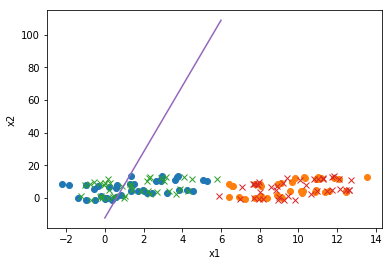

In [13]:
x1 = np.linspace(0, 6, 100)
print(w)
x2 = - (w[0] / w[2]) - ((w[1] / w[2]) * x1)



# plot the training data points
plt.plot(x[y==-1,0], x[y==-1,1], "o")
plt.plot(x[y==1,0], x[y==1,1], "o")

# plot the heldout data points
plt.plot(x_heldout[y_heldout==-1,0], x_heldout[y_heldout==-1,1], "x")
plt.plot(x_heldout[y_heldout==1,0], x_heldout[y_heldout==1,1], "x")

# plot the decision boundary 
plt.plot(x1, x2)
xlabel('x1')
ylabel('x2')

How well does the decision boundary separate the points in the two classes? Where do you think the decision boundary should go? And how does the boundary change as you train for longer (more epochs)? Plot train and heldout errors as a function of number epochs. Note that careful tuning of the learning rate is needed to get sensible behaviour. Using $\eta = \frac{1}{1+e}$ where $e$ is the epoch number often works well.

In [14]:
w_hat = np.zeros(Phi.shape[1])
T = 60
train_error = np.zeros(T)
heldout_error = np.zeros(T)
for e in range(T):
    # here we use a learning rate, which decays with each epoch
    lr = 1./(1+e)
    w_hat = ... # over to you
    
    train_error[e] = ... # over to you
    heldout_error[e] = ... # over to you

plot(train_error, label = 'Train Error')
plot(heldout_error, label = 'Held-out Error')
plt.legend()
xlabel('Epochs')
ylabel('Error')

TypeError: float() argument must be a string or a number, not 'ellipsis'

Does the heldout error track the training error closely? Is the model (i.e., weights at a given epoch) on the training set the same as the best model on the heldout set?

Now, let's plot the decision boundary using w_hat

In [ ]:
x1 = np.linspace(2, 10, 100)
print(w_hat)
x2 = - (w_hat[0] / w_hat[2]) - ((w_hat[1] / w_hat[2]) * x1)

# plot the training data points
plt.plot(x[y==-1,0], x[y==-1,1], "o")
plt.plot(x[y==1,0], x[y==1,1], "o")

# plot the heldout data points
plt.plot(x_heldout[y_heldout==-1,0], x_heldout[y_heldout==-1,1], "x")
plt.plot(x_heldout[y_heldout==1,0], x_heldout[y_heldout==1,1], "x")

# plot the decision boundary 
plt.plot(x1, x2)
xlabel('x1')
ylabel('x2')

Now generate training and heldout datasets that are not linearly separable, and investigate what happens to training and heldout errors with increasing number of epochs.